<a href="https://colab.research.google.com/github/rijalularif/python_basic_monthly_quantity/blob/main/python_basic_monthly_quantity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Penggunaan Python dalam Data Analysis, kali ini kita mengelola data **Date**, bagaimana cara **sorting values** di dataframe, penggunaan **pivot table** dan **groupby**, penggunaan SQL dengan **sqlite3**, dan mencoba membuat fungsi sederhana, serta mencoba membuat grafik sederhana dengan **matplotlib** dan **seaborn**.

# **DATE**

Dataset *'tokopaedi.csv'* di import dengan **pandas**, menjadi dataframe. Kolom *'order_date'* dan *'ship_date'* masih dalam tipe data object atau string, sehingga perlu diubah menjadi tipe data **DATE** atau **DATETIME**.

Langkah pertama kita mengimpor dataset dari tokopaedi.csv

In [11]:
import pandas as pd
import numpy as np
URL = 'https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/tokopaedi.csv'
df = pd.read_csv(URL)
df.dtypes

row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
subcategory       object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object

# **DATE**

Untuk mengubah tipe data dari kolom di dataframe
dapat menggunakan kode **pandas.to_datetime** atau **pd.to_datetime**

Seperti yang terlihat , yang awalnya memiliki tipe
data object atau string sekarang menjadi tipe data
datetime.

Mengubah tipe kolom Date(object) menjadi Datetime

In [15]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  subcategory    9994 n

# DATE

Dari tipe data datetime tersebut, kita dapat meng ekstrak beberapa hal seperti, nama hari, nama bulan, id bulan ,id hari dalam 1 minggu, tanggal, tahun, dan lainnya.

Disini kita akan membuat kolom tambahan untuk day, month, month_num.

In [16]:
df.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [17]:
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df['year']=df['order_date'].dt.year
df.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,subcategory,product_name,sales,quantity,discount,profit,day,month,month_num,year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Tuesday,November,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Tuesday,November,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Sunday,June,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Sunday,October,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Sunday,October,10,2015


# **sort_values**

Fungsi ini berguna untuk melakukan sorting dari yang terkecil ke yang terbesar atau sebaliknya ,dapat juga
diaplikasikan dalam sorting huruf sesuai abjad, dan dapat diaplikasikan ke dalam beberapa kolom.

Penggunaan sort_value

sort_values tujuannya adalah melakukan
sorting untuk kolom ***'order_date'*** secara
descending **(ascending=False)**, lalu sort_values lagi dengan kolom ***'quantity'*** secara
descending juga.

In [18]:
df_sort = df.sort_values(by=['order_date','quantity'],ascending=[False,False])
df_sort[['order_date','quantity']].head(5)

,order_date,quantity
907,2017-12-30,7
906,2017-12-30,4
908,2017-12-30,3
5096,2017-12-30,3
646,2017-12-30,2


# **pivot_table**

Fungsi ini berguna salah satunya untuk melakukan aggregasi

Kode ini berfungsi untuk membuat pivot table, dimana value nya adalah kolom ***'quantity'***, barisnya
adalah ***'region'***, dan kolomnya adalah ***'category'***. Hasil dari pivot ini merupakan
Dataframe juga. Disini aggregasi menggunakan
fungsi dari **numpy**

In [19]:
df_pivot = pd.pivot_table(df,values=['quantity'],index=['region'],columns=['category'],aggfunc=np.sum)
df_pivot

quantity                           
category Furniture Office Supplies Technology
region                                       
Central       1827            5409       1544
East          2214            6462       1942
South         1291            3800       1118
West          2696            7235       2335

# **groupby**

Fungsi ini berguna salah satunya untuk melakukan aggregasi Pada blok kode yang pertama ,dibuat groupby dari dataframe **'df'** yang hasil dari groupby ini adalah **series**. Sehingga setelah dilakukan groupby, perlu dilakukan lagi convert dari
series menjadi dataframe dengan cara pembacaan seperti di awal, pd.DataFrame, dan dilakukan reset_index, lalu di assign nama kolom untuk hasil aggregasinya atau values nya

Kolom **'Total'** adalah kolom value
hasil aggregasi **sum()**

In [21]:
df_groupby = df.groupby(by=["month_num","month"])["profit"].sum()
df_groupby

month_num  month    
1          January       9134.4461
2          February     10294.6107
3          March        28594.6872
4          April        11587.4363
5          May          22411.3078
6          June         21285.7954
7          July         13832.6648
8          August       21776.9384
9          September    36857.4753
10         October      31784.0413
11         November     35468.4265
12         December     43369.1919
Name: profit, dtype: float64

Merubah output groupby (series) menjadi DataFrame

reset_index untuk memberi header pada kolom hasil groupby

In [22]:
df_groupby_new = pd.DataFrame(df_groupby.reset_index(name='Total'))
df_groupby_new

,month_num,month,Total
0,1,January,9134.4461
1,2,February,10294.6107
2,3,March,28594.6872
3,4,April,11587.4363
4,5,May,22411.3078
5,6,June,21285.7954
6,7,July,13832.6648
7,8,August,21776.9384
8,9,September,36857.4753
9,10,October,31784.0413


# **SQL Command dengan sqlite3**
Di Python kita juga bisa menjalankan perintah SQL dengan menggunakan module **sqlite3**, setelah import module kita perlu convert dataframe yang sudah ada, dalam hal ini dataframe **df** ke sql dengan perintah,

misalkan :

***df_orderdetail.to_sql('order_detail', conn, index=False, if_exists = 'replace')***

Dimana ***'df_orderdetail'*** adalah nama dataframe yang sudah ada, **'order_detail'** adalah nama tabel yang ditentukan dalam format sql nya, **conn** merupakan syntax default nya dari connect(':memory:'), **index=False** adalah index dari
dataframe nya tidak ikut disertakan dalam table, **if_exists** jika sudah ada nama tabel di sql yang tersimpan dengan nama yang sama, di replace.



In [24]:
from sqlite3 import connect
conn = connect(':memory:')
df.to_sql('tokopaedi', conn, index=False, if_exists='replace')

9994

## **Query SQL**

In [25]:
df_sql = pd.read_sql("""
    SELECT
      tokopaedi.city,
      sum(tokopaedi.profit) profit
    from
      tokopaedi
    group by
      1
    order by
      2 desc
    limit 10
    """, conn)
df_sql

,city,profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908
5,Lafayette,10018.3876
6,Jackson,7581.6828
7,Atlanta,6993.6629
8,Minneapolis,6824.5846
9,San Diego,6377.1960


# **Membuat Function**

membuat function dengan nama condition(). Pada blok kode selanjutnya
adalah pembuatan kolom **'status'** di dataframe df, dengan isi berdasarkan kolom **'quantity'**, dengan fungsi jika kolom **'quantity'** berisi value 2, maka kolom **'status'** valuenya adalah 'High'.

In [26]:
def condition(value):
  if value > 2:
    return 'High'
  elif value == 2:
    return 'Medium'
  else:
    return 'Low'

## **Pengaplikasian fungsi**

mengikuti dari Function yang
dipakai function condition, dengan metode apply



In [27]:
df['status'] = df['quantity'].apply(condition)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_name,sales,quantity,discount,profit,day,month,month_num,year,status
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Tuesday,November,11,2016,Medium
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Tuesday,November,11,2016,High
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Sunday,June,6,2016,Medium
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Sunday,October,10,2015,High
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Sunday,October,10,2015,Medium


# **Membuat Grafik Visualisasi**

Dengan dataframe **'df_groupby_new'** (dataframe setelah di groupby) di plot dimana sumbu x
adalah kolom **'month'** yang isinya adalah nama nama
bulan, kemudian sumbu y adalah **'Total'** dimana
merupakan aggregasi berdasarkan kolom **'month'**
(sesuai groupby), jenis grafiknya adalah **bar**

<ipython-input-30-2b85d78c9124>:1: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  df_groupby_new.plot(x = 'month',


<Axes: title={'center': 'Monthly Total Quantity'}, xlabel='Month', ylabel='Total'>

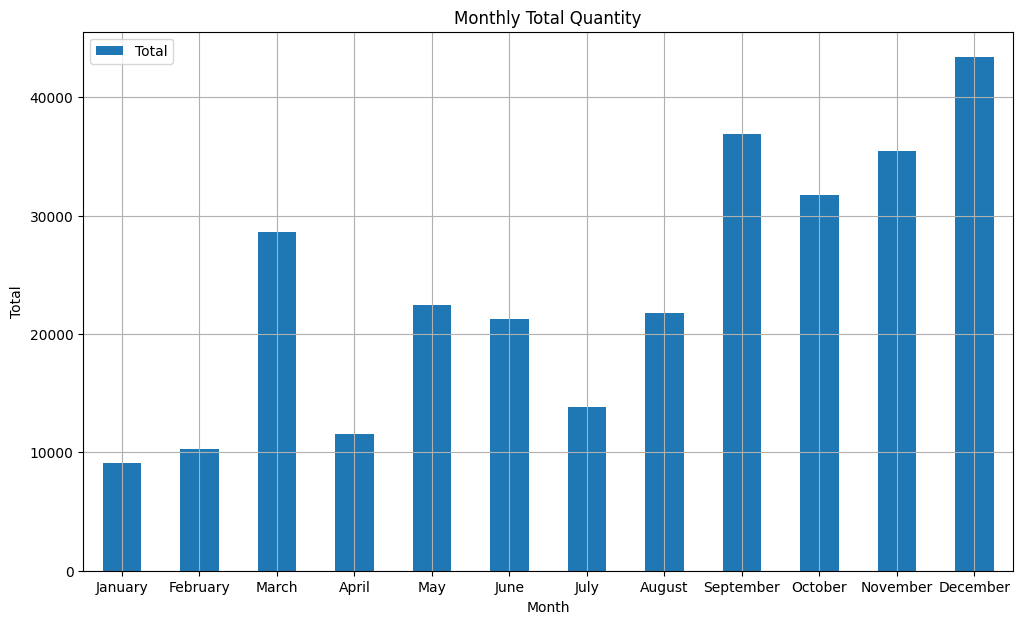

In [30]:
df_groupby_new.plot(x = 'month',
                    y = ['Total'],
                    kind = 'bar',
                    grid = True,
                    xlabel = 'Month',
                    ylabel = 'Total',
                    figsize = (12,7),
                    rot = 0,
                    title = 'Monthly Total Quantity',
                    table = False,
                    sort_columns = False,
                    secondary_y = False)

# **Tampilkan TOP 5 Category selama 2016 dengan berdasarkan profit yang paling tinggi.**


**top_5_city** adalah dataframe diambil dari base data **df** yang sudah di define sebelumnya, yang
kemudian di filter, lalu groupby, kemudian convert ke dataframe kembali dengan reset_index, lalu di sort_values by profit descending, lalu diambil 5 yang teratas ,dan terakhir di reset index nya.

In [34]:
import seaborn as sns

top_5_city = pd.DataFrame(\
                          df[df['year'] == 2016]\
                          # groupby
                          .groupby(by = ["city", "month", "year",])["profit"].sum()\
                          # reset index untuk jadikan datafarame kembali
                          .reset_index(name = 'profit')\
                          # sort values descending by profit
                          .sort_values(by = 'profit', ascending = False)\
                          # ambil top 5 produk
                          .head(5)\
                          # reset index
                          .reset_index(drop = True)
                          )

Selanjutnya pada bagian plot, sumbu x merupakan kolom **city** dan sumbu y merupakan **profit** hasil ggregasi. Lalu label untuk sumbu x adalah **Month 2016**, dan label untuk sumbu y adalah **Profit**, kemudian judul dari grafik ini ada di **title = 'Monthly Total Quantity 2016'**.

### Untuk membuat tampilan grafik dengan default matplotlib

<Axes: title={'center': 'Monthly Total Quantity - 2016'}, xlabel='Month-2016', ylabel='Profit'>

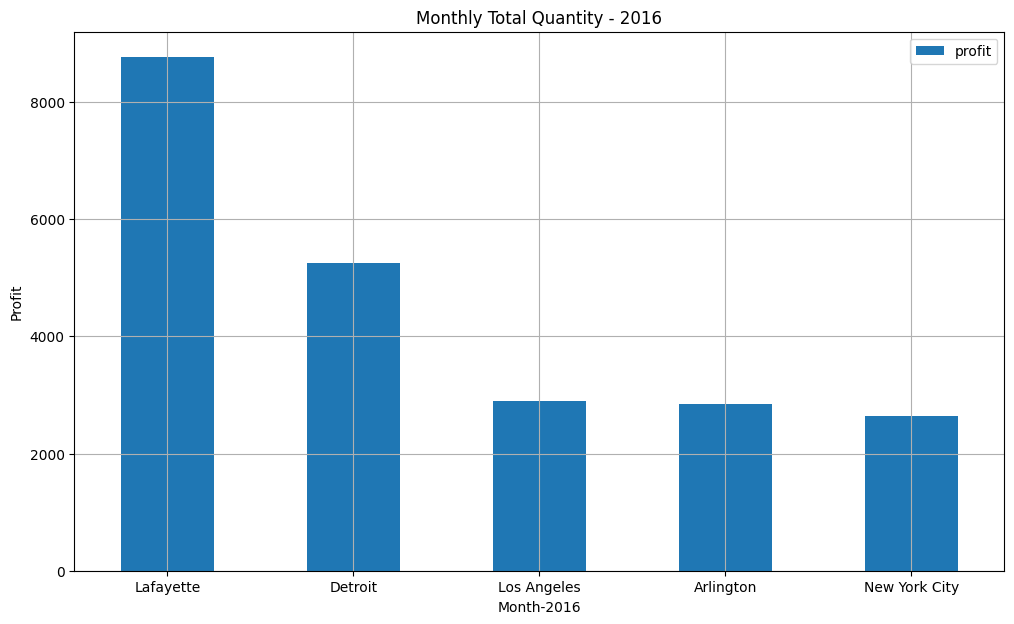

In [35]:
top_5_city.plot(x = 'city',
                y = ['profit'],
                kind = 'bar',
                grid = True,
                xlabel = 'Month-2016',
                ylabel = 'Profit',
                figsize = (12,7),
                rot = 0,
                title = 'Monthly Total Quantity - 2016',
                table = False,
                secondary_y = False
                )

### Untuk membuat tampilan grafik dengan default Seaborn

<Axes: title={'center': 'Monthly Total Quantity - 2016'}, xlabel='Month-2016', ylabel='Profit'>

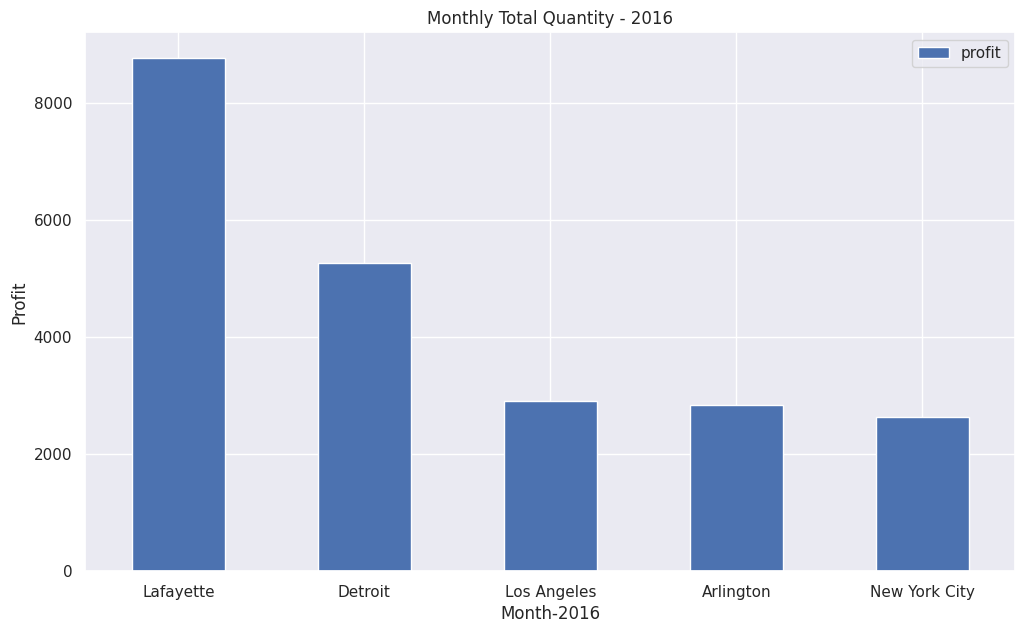

In [36]:
sns.set()
top_5_city.plot(x = 'city',
                y = ['profit'],
                kind = 'bar',
                grid = True,
                xlabel = 'Month-2016',
                ylabel = 'Profit',
                figsize = (12,7),
                rot = 0,
                title = 'Monthly Total Quantity - 2016',
                table = False,
                secondary_y = False
                )